<h1><center>Suicide Diagnosis Statistics</center></h1> 
__<div style="text-align: right"> Junyan Huang</div>__
__<div style="text-align: right"> Oct 9, 2018 WEEK 6</div>__

This project is to find out the suicide methods in the diagnosis dataset.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import re


In [226]:
sui_diagnosis = pd.read_csv("sui_diagnosis.csv", header=0, sep=",")

In [227]:
pd.set_option('max_colwidth',1000)
print(sui_diagnosis.shape)

(4287, 8)


In [228]:
patientunitstayid = sui_diagnosis["patientunitstayid"]
patientunitstayid.nunique()

1470

In [229]:
new_df = sui_diagnosis.drop(["Unnamed: 0", "diagnosisid"], axis=1)
print(new_df.shape)

(4287, 6)


In [230]:
new_df.loc[new_df["patientunitstayid"]==147041]

,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
7,147041,True,503,toxicology|drug overdose|drug overdose- general|previous suicide attempts,NaN,Primary
8,147041,True,503,toxicology|drug overdose|drug overdose- general|suicide gesture,NaN,Primary
9,147041,False,18,toxicology|drug overdose|drug overdose- general|previous suicide attempts,NaN,Primary
10,147041,False,260,toxicology|drug overdose|drug overdose- general|previous suicide attempts,NaN,Primary
11,147041,False,260,toxicology|drug overdose|drug overdose- general|suicide gesture,NaN,Primary
12,147041,False,18,toxicology|drug overdose|drug overdose- general|suicide gesture,NaN,Primary


In the dataset, there are some patientunitstayids have the same diagnosis in diiferent off set time. In this case, only one diagnosis string will be kept.

In [231]:
new_df2 = new_df.drop(["activeupondischarge", "diagnosisoffset", "icd9code", "diagnosispriority"], axis=1)
print(new_df2.head())

   patientunitstayid  \
0             143389   
1             143389   
2             144741   
3             146060   
4             146486   

                                                             diagnosisstring  
0  toxicology|drug overdose|drug overdose- general|previous suicide attempts  
1            toxicology|drug overdose|drug overdose- general|suicide attempt  
2  toxicology|drug overdose|drug overdose- general|previous suicide attempts  
3            toxicology|drug overdose|drug overdose- general|suicide gesture  
4                  neurologic|altered mental status / pain|suicidal ideation  


In [232]:
new_df3 = new_df2.drop_duplicates()
print(new_df3.shape)
new_df3.loc[new_df["patientunitstayid"]==147041]

(1878, 2)


,patientunitstayid,diagnosisstring
7,147041,toxicology|drug overdose|drug overdose- general|previous suicide attempts
8,147041,toxicology|drug overdose|drug overdose- general|suicide gesture


The duplicates are dropped. Only the first occurance is kept. The new_df3 has 1878 rows of diagnosis records. These records will be used.

In [233]:
new_df3.isnull().sum()

patientunitstayid    0
diagnosisstring      0
dtype: int64

In [234]:
new_df3.shape

(1878, 2)

No diagnosis string is missing.

Extra the diagnosis strings from the dataset.

In [235]:
sui_patientunitstayid = list(new_df3["patientunitstayid"])
#print(len(sui_patientunitstayid))
string = list(new_df3["diagnosisstring"])
#print(len(string))

In [236]:
def counter(mylist):
    result = {}
    for index,item in enumerate(mylist):
        if item in result.keys():
            result[item]+=1   
        else:
            result[item]=1
    return result

In [237]:
string_sum = counter(string)
print(string_sum)

{'toxicology|drug overdose|drug overdose- general|suicide attempt': 881, 'neurologic|altered mental status / pain|suicidal ideation': 468, 'toxicology|drug overdose|drug overdose- general|suicide gesture': 193, 'toxicology|drug overdose|drug overdose- general|previous suicide attempts': 336}


In [238]:
string_df = pd.DataFrame.from_dict(string_sum,orient='index')
string_df = string_df.reset_index()
string_df = string_df.rename(columns={"index":"diagnosis_string", 0:"number"})
pd.set_option('max_colwidth',1000)

In [239]:
string_df["number"].sum()

1878

In [240]:
string_df["percent%"]= (string_df["number"]/string_df["number"].sum()*100).round(2)

In [241]:
print(string_df)

                                                            diagnosis_string  \
0            toxicology|drug overdose|drug overdose- general|suicide attempt   
1                  neurologic|altered mental status / pain|suicidal ideation   
2            toxicology|drug overdose|drug overdose- general|suicide gesture   
3  toxicology|drug overdose|drug overdose- general|previous suicide attempts   

   number  percent%  
0     881     46.91  
1     468     24.92  
2     193     10.28  
3     336     17.89  


In [242]:
import matplotlib.pyplot as plt

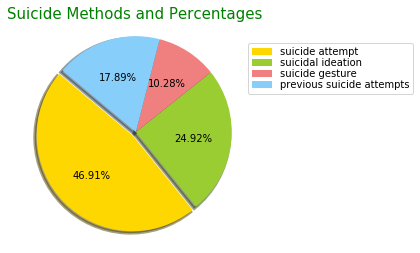

In [243]:
data = list(string_df["number"])
labels=["suicide attempt", "suicidal ideation", "suicide gesture", 
        "previous suicide attempts"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.05, 0, 0, 0)
plt.pie(data, explode=explode, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140, pctdistance=0.6, counterclock=True, 
        wedgeprops = {'linewidth': 3}, labels=None)
plt.axis("scaled")
plt.legend(labels,labelspacing=0.1, loc="right", bbox_to_anchor=(1.8,0.8))
plt.title("Suicide Methods and Percentages", color="green", size=15)
plt.show()


In the 1878 diagnosis records, 46.91% of them are suicide attempts, 17.89% have previous suicide attempts, 34.92% are suicide gestures, while 10.28% are suicide gestures.

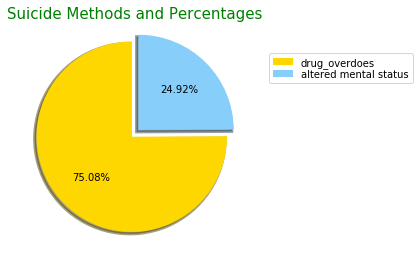

In [244]:
drug_overdoes = string_df.iloc[0,1] + string_df.iloc[2,1]+string_df.iloc[3,1]
ideation = string_df.iloc[1,1]
data = [drug_overdoes, ideation]
labels=["drug_overdoes", "altered mental status"]
colors = ['gold', 'lightskyblue']
explode = (0, 0.1)
plt.pie(data, explode=explode, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=90, pctdistance=0.6, counterclock=True, 
        wedgeprops = {'linewidth': 3}, labels=None)
plt.axis("scaled")
plt.legend(labels,labelspacing=0.1, loc="right", bbox_to_anchor=(1.8,0.8))
plt.title("Suicide Methods and Percentages", color="green", size=15)
plt.show()

About three quarters of suicide records are by drug overdose, and one quarter are caused by altered mental status or pain which leads to suicidal ideation.

## Check Overlappings
It seems like there are some overlappings in the dataset. For example, a patient has suicidal ideation may also has committed suicide.

In [245]:
is_ideation = sui_diagnosis["diagnosisstring"].str.contains("ideation")

In [246]:
ideation = sui_diagnosis[is_ideation]

In [247]:
ideation.shape

(1105, 8)

In [248]:
ideation_patient = np.array(ideation["patientunitstayid"])

In [249]:
len(ideation_patient)

1105

In [250]:
suicide_all = sui_diagnosis[sui_diagnosis["diagnosisstring"].str.contains("suicide")]

In [251]:
suicide_all.shape

(3182, 8)

In [252]:
suicide_patient =np.array(suicide_all["patientunitstayid"])

In [253]:
is_ideation_and_suicide = np.isin(ideation_patient,suicide_patient)

In [254]:
ideation_and_suicide_patient = ideation[is_ideation_and_suicide]["patientunitstayid"]

In [255]:
len(ideation_and_suicide_patient.unique())

78

There are 78 patients in the dataset that have suicidal ideation and have committed suicide.

drop duplicates in the suicide dataset and the ideation dataset. The rows with same patientunitstayid and same diagnosisstring will be drop except the first occurence.

In [256]:
ideation_clean = ideation.drop_duplicates(subset=["patientunitstayid", "diagnosisstring"])

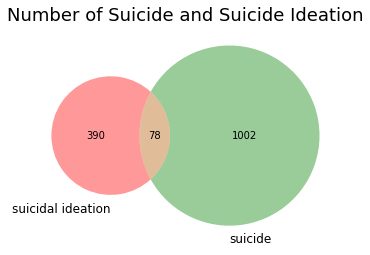

In [257]:
venn2([set(np.array(ideation_clean["patientunitstayid"])), set(np.array(suicide_all_clean["patientunitstayid"]))],
      set_labels = ('suicidal ideation', 'suicide'))
plt.title("Number of Suicide and Suicide Ideation", size=18)
plt.show()

In [258]:
ideation_clean.shape

(468, 8)

In [259]:
suicide_all_clean = suicide_all.drop_duplicates(subset=["patientunitstayid", "diagnosisstring"])

In [260]:
suicide_all_clean.shape

(1410, 8)

In [261]:
previous_suicide_clean = suicide_all_clean[suicide_all_clean["diagnosisstring"].str.contains("previous suicide attempts")]

In [262]:
previous_suicide_clean.shape

(336, 8)

In [263]:
suicide_gesture_clean = suicide_all_clean[suicide_all_clean["diagnosisstring"].str.contains("suicide gesture")]

In [264]:
suicide_gesture_clean.shape

(193, 8)

In [265]:
suicide_attempt_clean = suicide_all_clean[suicide_all_clean["diagnosisstring"].
                                          str.contains("\\bsuicide attempt\\b", case=True, regex=True)]


In [266]:
suicide_attempt_clean.shape

(881, 8)

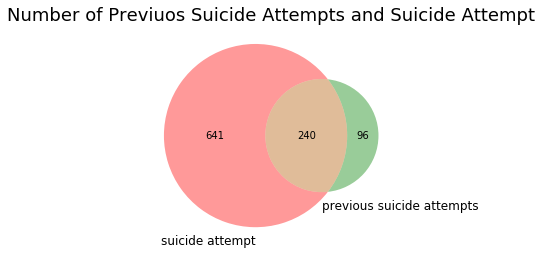

In [267]:
venn2([set(np.array(suicide_attempt_clean["patientunitstayid"])), set(np.array(previous_suicide_clean["patientunitstayid"]))],
      set_labels = ('suicide attempt', 'previous suicide attempts'))
plt.title("Number of Previuos Suicide Attempts and Suicide Attempt", size=18)
plt.show()

240 out of 881 of the suicide attempt records are not the first attempt. 

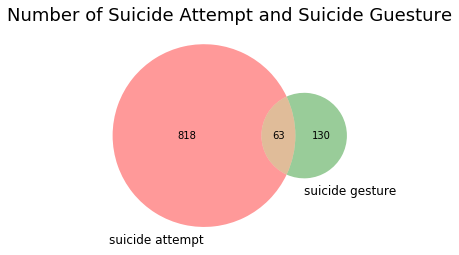

In [268]:
venn2([set(np.array(suicide_attempt_clean["patientunitstayid"])), set(np.array(suicide_gesture_clean["patientunitstayid"]))],
      set_labels = ('suicide attempt', 'suicide gesture'))
plt.title("Number of Suicide Attempt and Suicide Guesture", size=18)
plt.show()

63 out of 881 of the suicide attempt records are suicide gestures. 63 out of 193 suicide guesture records are real suicide.

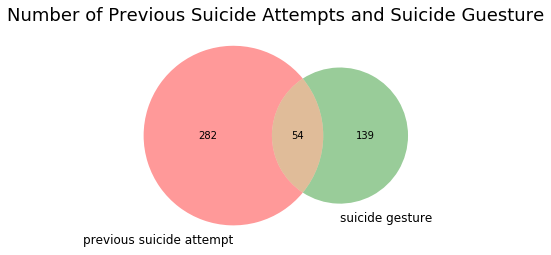

In [269]:
venn2([set(np.array(previous_suicide_clean["patientunitstayid"])), set(np.array(suicide_gesture_clean["patientunitstayid"]))],
      set_labels = ('previous suicide attempt', 'suicide gesture'))
plt.title("Number of Previous Suicide Attempts and Suicide Guesture", size=18)
plt.show()

54 out of 193 suicide guesture records are not the first try.

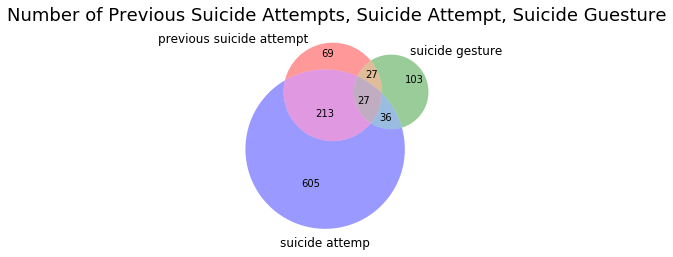

In [270]:
set1 =set(np.array(previous_suicide_clean["patientunitstayid"]))
set2 = set(np.array(suicide_gesture_clean["patientunitstayid"]))
set3= set(np.array(suicide_attempt_clean["patientunitstayid"]))
set4=set(np.array(ideation_clean["patientunitstayid"]))
venn3([set1, set2, set3], set_labels = ('previous suicide attempt', 'suicide gesture', "suicide attemp"))
plt.title("Number of Previous Suicide Attempts, Suicide Attempt, Suicide Guesture", size=18)
plt.show()

set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])